In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.15.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

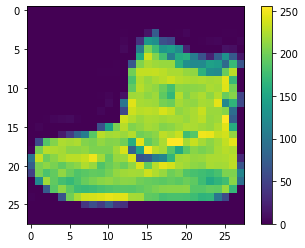

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


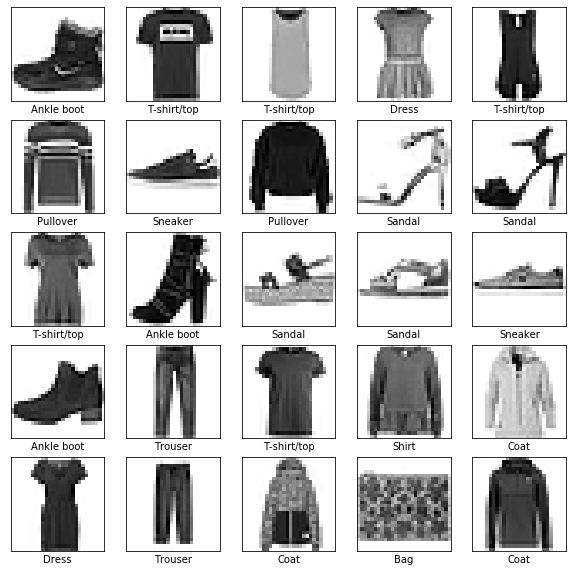

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
# нормализуем данные
train_images = train_images / 255.0

test_images = test_images / 255.0

# построим модель

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# обучим модель

In [11]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5021 - acc: 0.8244
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3752 - acc: 0.8648
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3366 - acc: 0.8765
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3131 - acc: 0.8852
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2958 - acc: 0.8923
Epoch 6/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2806 - acc: 0.8969
Epoch 7/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2682 - acc: 0.9014
Epoch 8/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2567 - acc: 0.9052
Epoch 9/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2493 - acc: 0.9077
Epoch 10/10
60000/60000 [==============================] - 

# оценим точность

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('\nТочность на проверочных данных:', test_acc)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3368 - acc: 0.8814

Точность на проверочных данных: 0.8814


# сделаем предсказания

In [0]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([9.4958523e-07, 5.8658927e-08, 7.8061300e-09, 1.8353926e-09,
       2.8143745e-07, 5.2607560e-04, 4.5294550e-07, 7.2187064e-03,
       2.8713478e-07, 9.9225324e-01], dtype=float32)

In [21]:
np.argmax(predictions[0]), test_labels[0]

(9, 9)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


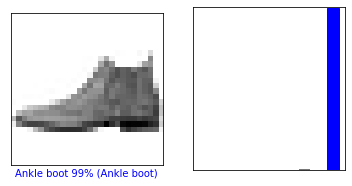

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

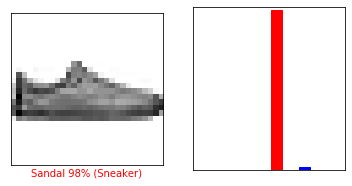

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

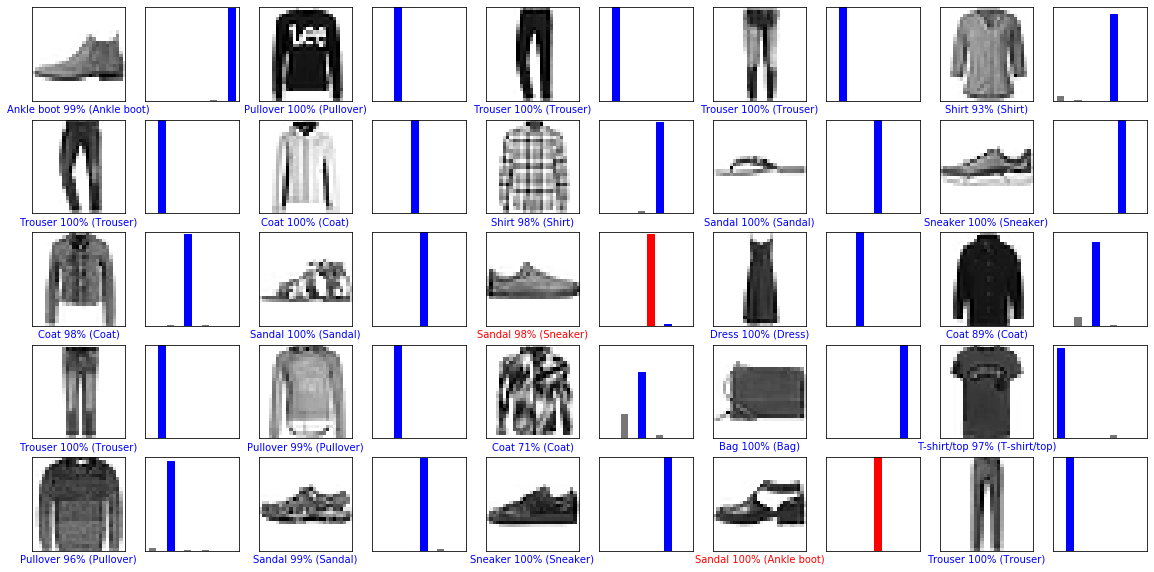

In [26]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


In [27]:
# Берем одну картинку из проверочного сета.
img = test_images[0]

print(img.shape)

(28, 28)


In [28]:
# Добавляем изображение в пакет данных, состоящий только из одного элемента.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = model.predict(img)

print(predictions_single, '\n', np.argmax(predictions_single))

[[9.4958432e-07 5.8658699e-08 7.8061602e-09 1.8353959e-09 2.8143799e-07
  5.2607636e-04 4.5294638e-07 7.2187097e-03 2.8713586e-07 9.9225324e-01]] 
 9


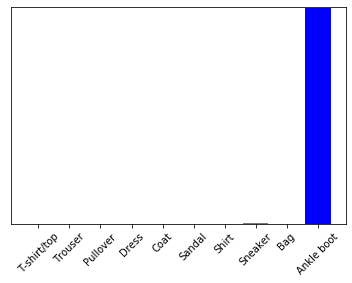

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)